# 本福特自动机

## 问题

对于任意一个正整数 $x_0$，对它乘 $2$，重复进行 $t$ 次并都记录下所得的数字的首位数字。

从 $x_0 = 1 \dots 9$ 开始试验，并把所得的数的首位数合在一起，这些首位数字的分布是什么样的？

## 计算首位数字

这个问题的一个难点是计算一个数 $x$ 的首位数字。

* 如果 $x$ 在 $1$ 到 $10$ 之间（包括 $1$ 但不包括 $10$），那么好办，我们只要把它取整即可。
* 如果 $x>=10$，那我们可以对它反复除 $10$ 直到它在 $[1, 10)$ 以内，这就回到了上一步的问题。

以上想法可以转换为下面这算法：

```
def get_leading_digit(x):
    while x >= 10:
        x /= 10
    return int(x)
```

严格讲起来，我们还要考虑 $[0, 1)$ 里的数和负数，但这里我们用不到，就不写了。

下面这个是一个参考程序。

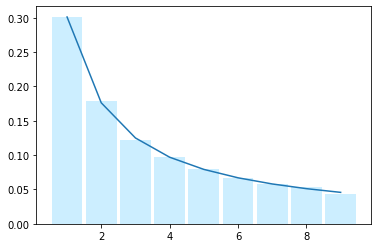

In [8]:
import random, math

def differential_equation(x0, tmax):
    result = []
    for t in range(tmax+1):
        # 计算 x = x0 * exp(t)
        # 所以如果在 t 上加 ln(10)，相当于在 x 上乘以10，首数字不变
        t1 = t % math.log(10)
        x = x0 * math.exp(t)
        result.append( get_leading_digit(x) )
    return result

def simulation2(tmax):
    result = []
    for x0 in range(1, 10):
        result.extend(differential_equation(x0, tmax))
    return result
                    
import matplotlib.pyplot as plt
plt.hist(simulation2(100), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

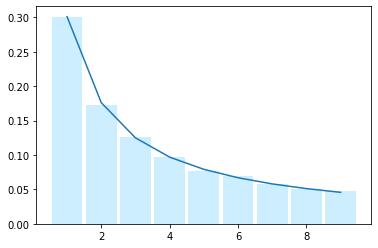

In [39]:
import math

def get_leading_digit(x):
    while x >= 10:
        x //= 10 # "//" 可以用于大整数和浮点数
    return int(x)

def multiply(x0, tmax):
    return [get_leading_digit(x0*2**t) for t in range(tmax+1)]

def simulation(tmax):
    result = []
    for x0 in range(1, 10):
        result.extend(multiply(x0, tmax))
    return result
                    
import matplotlib.pyplot as plt
plt.hist(simulation(100), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

其实我们并不用从 $9$ 个数字开始然后平均，即便是从单一的一个数字开始模拟也会得到同样的结果。

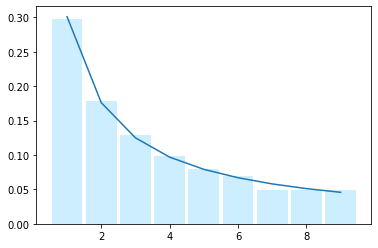

In [48]:
plt.hist(multiply(3.14, 100), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

## 理论

很显然，我们得到的分布不是一个均匀分布。为什么呢？

原因是在乘 $2$ 这个操作对应于

$\begin{align}
\log_{10} x &\rightarrow \log_{10} x + \log_{10} 2 \\
&\approx \log_{10} x + 0.301\dots
\end{align}$

也就是对应于在对数数轴 $\log_{10} x$ 上的一个平移。

由于我们只对首数字感兴趣，我们可以等价地只考虑 $\log_{10} x$ 的小数部分，也就是把 $\log_{10} x$ 周期性地折回 $[0, 1)$ 之间。

比如，$x = 32, \log_{10} x = 1.505$ 取小数部分得到的是 $\log_{10} x' = 0.505$，对应于 $x' = 3.2$；两者的首数字是相同的。

这样，对于首数字而言，我们只需要考虑的是一个它的对数的小数部分（上例中的 $0.505$）在 $[0, 1)$ 中的位置。

比如，对 $\log_{10} x$ 的小数部分
 * 如果落在 $[0, \log_{10} 2) \approx [0, 0.301)$ 区间里，则首数字是 $1$ 
 * 如果落在 $[\log_{10} 2, \log_{10} 3) \approx [0.301, 0.477)$ 区间里，则首数字是 $2$
 * ……
 * 如果落在 $[\log_{10} 9, 1) \approx [0.954, 1)$ 区间里，则首数字是 $9$
 
由于乘 $2$ 对应于 $\log_{10} x$ 的一个平移，平移量 $\log_{10} 2 = 0.301\dots$ 又不是一个有理数。
可以想象反复这样操作会把 $\log_{10} x$ 的小数部分打乱，使其在 $[0, 1)$ 成为一个均匀分布。
这和同余随机数发生器的原理是一样的。（这里需要思考一下，为什么是 $\log_{10} x$ 而不是 $x$ 变成一个均匀分布？）

所以，首数字为 $1$ 的几率为 $0.301 - 0 \dots \approx 30.1\%$，会远远比首数字为 $9$ 的几率 $1-0.954\dots \approx 4.6\%$ 大！

一般地，首数字为 $d$ 的几率为

$p(d) = \log_{10}\left(\frac{d+1}{d}\right).$

在上述程序中， 折线所显示的就是这个公式的值。我们看到和模拟的直方图的结果是非常接近的。

## 本福特定律

这个公式叫做本福特定律。它是由 Simon Newcomb 和 Frank Benford 发现的。

本福特定律，即首位是1的数字大约占到30%的现象，无处不在。它也经常作为一个统计工具来监测数据异常。

比如，斐波那契数列

$a_0 = 0$, $a_1 = 1$, $a_{n} = a_{n-1} + a_{n-2}$ （$n \ge 2$） 

这个数列的首数字也是满足本福特定律的。我们可以验证一下

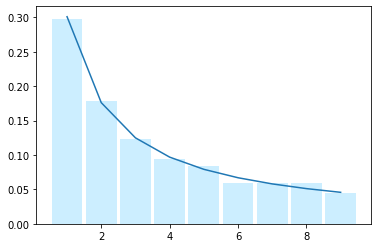

In [56]:
def fibonacci(n):
    x, y = 1, 1
    result = [x, y]
    for i in range(n):
        x, y = y, x + y
        result.append(get_leading_digit(y))
    return result

plt.hist(fibonacci(200), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

## 连续演化的模型

虽然我们的演化模型是离散的：它每次把 $x$ 乘 $2$，它可以被一个连续的微分方程替代，得到相似的结果。

事实上，本福特定律一般是用连续演化的模型来推导的（比如用于人口增长，细胞繁殖等大数）。

从 $x_0$，用以下微分方程来演化

$dx/dt = x,$

这样得到的数字 $x(t)$ 的首数字的时间平均也是满足本福特定律的。

我们可以算出这个微分方程的解是

$x(t) = x_0 \exp(t).$

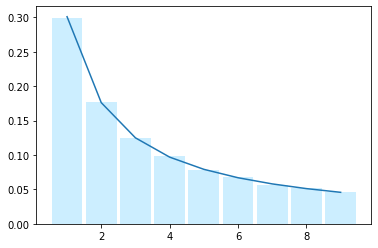

In [55]:
import random, math

def diff_eq(x0, tmax):
    result = []
    x = x0
    dt = 1
    for t in range(tmax+1):
        # 由于微分方程的解是 x = x0 exp(t)
        # 我们有 x(t+dt) = x(t) exp(dt)
        result.append(get_leading_digit(x))
        x *= math.exp(dt)
        # 为了防止 x 的值过大，我们把小数点左移几位
        while x > 10:
            x *= 0.1
    return result

plt.hist(diff_eq(3.14, 1000), bins=9, range=(0.5,9.5), density=True, color='#cef', rwidth=0.9)
plt.plot(range(1, 10), [math.log10(1+1/x) for x in range(1, 10)])
plt.show()

## 扩展阅读

* [李永乐老师对本福特定律的介绍](https://mp.weixin.qq.com/s/pXEr11FAesA2TmPSC8cN4A)